In [4]:
import numpy as np
import os
import cv2
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("test1")
desired_height = 16
desired_width = 16
def proccesingFeatures(input_path, label2, width, height,images,Image_Normal,imagesRgb,imagesCannyEdge):
    image = cv2.imread(input_path)
    image = cv2.resize(image, (width, height))
    imageCannyEdge = canny_edge_detection(image)
    imageCannyEdge=(imageCannyEdge)
    imagesCannyEdge.append(imageCannyEdge)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imagesRgb.append(rgb_image)
    Image_Normal.append((image))
    
    tht = 0
    sgm = 1
    freq = 0.2
    

    #result = apply_gabor_filter(image, freq, tht, sgm)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    images.append(laplacian)
    
    """     # Read the input image
    image = cv2.imread(input_path)
    image = cv2.resize(image, (width, height))
    imageCannyEdge = canny_edge_detection(image)
    imageCannyEdge=int(np.mean(imageCannyEdge))
    imagesCannyEdge.append(imageCannyEdge)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imagesRgb.append(int(np.mean(rgb_image)))
    Image_Normal.append((image))
    """
    #cv2.imwrite(train_images_Output+"canny/"+ label2+'.jpg', imageCannyEdge)
    # cv2.imwrite(train_images_Output+"rgb/"+ label2+'.jpg', rgb_image)
def canny_edge_detection(image):
    gryimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blrimg = cv2.GaussianBlur(gryimg, (5, 5), 0)
    edges = cv2.Canny(blrimg, 50, 150)

    return edges
def apply_gabor_filter(image, freq, tht=0, sgm=1):
    realGab = cv2.getGaborKernel((5, 5), sgm, tht, 1, 0, ktype=cv2.CV_32F)
    filterGabor = cv2.getGaborKernel((5, 5), sgm, tht, 1, 0.5, ktype=cv2.CV_32F)
    filtered_real = ndimage.convolve(image, realGab)
    filtered_imag = ndimage.convolve(image, filterGabor)
    magnitude = np.sqrt(filtered_real**2 + filtered_imag**2)

    return magnitude
# import cv2

# def proccesingFeatures(input_path, output_path, width, height):
#     # Read the input image
#     image = cv2.imread(input_path)

#     # Resize the image
#     resized_image = cv2.resize(image, (width, height))

#     # Save the resized image
#     cv2.imwrite(output_path, resized_image)

# if __name__ == "__main__":
#     # Input and output file paths
#     input_image_path = "path/to/your/input/image.jpg"
#     output_image_path = "path/to/your/output/resized_image.jpg"

#     # Specify the desired width and height
#     desired_width = 500
#     desired_height = 300

#     # Resize the image
#     proccesingFeatures(input_image_path, output_image_path, desired_width, desired_height)

#     print("Image resized successfully.")
test_labels = []
train_labels = []




Train_Laplacian = []
Tree_Laplacian = []

Train_RGB = []
Test_RGB = []

Train_CannyEdge = []
Test_CannyEdge = []
def calculate_average_pixels(images):
    return np.mean(images, axis=0)
def load_dataset(images_path,imagesPath2,imagesPath3,imagesPath4,imagesPath5,imagesPath6,imagesPath7,imagesPath8,imagesPath9,imagesPath10,images,labels,imagesRgb,imagesCannyEdge,limit):

    iCount = 0   
    print(images_path)
    Image_Normal = []
    for file in os.listdir(images_path):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(images_path, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(0)
        
        iCount += 1

        
        if iCount >= limit:
            break
    
    # Counter to keep track of iterations
    iCount = 0   
    print(imagesPath2)
    for file in os.listdir(imagesPath2):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath2, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(1)
        
        iCount += 1

        
        if iCount >= limit:
            break
    iCount = 0   
    print(imagesPath3)
    for file in os.listdir(imagesPath3):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath3, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(2)
        
        iCount += 1

        
        if iCount >= limit:
            break
    iCount = 0   
    print(imagesPath4)
    for file in os.listdir(imagesPath4):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath4, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(3)
        
        iCount += 1

        
        if iCount >= limit:
            break
        
    iCount = 0   
    print(imagesPath5)
    for file in os.listdir(imagesPath5):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath5, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(4)
        
        iCount += 1

        
        if iCount >= limit:
            break    
    iCount = 0   
    print(imagesPath6)
    for file in os.listdir(imagesPath6):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath6, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(5)
        
        iCount += 1

        
        if iCount >= limit:
            break    
    iCount = 0   
    print(imagesPath7)
    for file in os.listdir(imagesPath7):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath7, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(6)
        
        iCount += 1

        
        if iCount >= limit:
            break
    iCount = 0   
    print(imagesPath8)
    for file in os.listdir(imagesPath8):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath8, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(7)
        
        iCount += 1

        
        if iCount >= limit:
            break    
        
    iCount = 0   
    print(imagesPath9)
    for file in os.listdir(imagesPath9):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath9, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(8)
        
        iCount += 1

        
        if iCount >= limit:
            break    
    iCount = 0   
    print(imagesPath10)
    for file in os.listdir(imagesPath10):
        label = file.split("_")[0]  
        label2=label
        label = int(label)  

        image_path = os.path.join(imagesPath10, file)
        proccesingFeatures(image_path, label2, desired_width, desired_height,images,Image_Normal,imagesRgb,imagesCannyEdge)

        labels.append(9)
        
        iCount += 1

        
        if iCount >= limit:
            break    
        
            
    return images, labels
    # for root, dirs, files in os.walk(images_path):

    #     for file in files:
    #         # Assuming image names are in the format "label_image_number.jpg"
    #         label = file.split("_")[0]  # Extract the label from the filename
    #         label = int(label)  

    #         image_path = os.path.join(root, file)
    #         image = cv2.imread(image_path)  # Use OpenCV to read the image
    #         images.append(image)
    #         labels.append(label)
    #         # You may need to resize or preprocess the image based on your requirements
    #         proccesingFeatures(images_path, train_images_Output, desired_width, desired_height)
         

    # return images, labels


train_images, train_labels = load_dataset("./flowers/train/astilbe","./flowers/train/bellflower","./flowers/train/carnation","./flowers/train/daisy","./flowers/train/dandelion","./flowers/train/iris","./flowers/train/rose","./flowers/train/sunflower","./flowers/train/tulip","./flowers/train/water_lily",Train_Laplacian,train_labels,Train_RGB,Train_CannyEdge,60)
test_images, test_labels = load_dataset("./flowers/test/astilbe","./flowers/test/bellflower","./flowers/test/carnation","./flowers/test/daisy","./flowers/test/dandelion","./flowers/test/iris","./flowers/test/rose","./flowers/test/sunflower","./flowers/test/tulip","./flowers/test/water_lily",Tree_Laplacian,test_labels,Test_RGB,Test_CannyEdge,8)

print("test2")


test1
./flowers/train/astilbe
./flowers/train/bellflower
./flowers/train/carnation
./flowers/train/daisy
./flowers/train/dandelion
./flowers/train/iris
./flowers/train/rose
./flowers/train/sunflower
./flowers/train/tulip
./flowers/train/water_lily
./flowers/test/astilbe
./flowers/test/bellflower
./flowers/test/carnation
./flowers/test/daisy
./flowers/test/dandelion
./flowers/test/iris
./flowers/test/rose
./flowers/test/sunflower
./flowers/test/tulip
./flowers/test/water_lily
test2


In [5]:
#print("test3")
       
class Node:
    def __init__(self, ftr_Index=None, threshold=None, value=None, left=None, right=None):
        self.ftr_Index = ftr_Index  
        self.threshold = threshold  
        self.right = right  
        self.value = value 
        self.left = left  
class DecisionTree:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth
    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        prbties = (counts / len(y))
        entropy = -np.sum(prbties * np.log2(prbties))
        return entropy
    def find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None
        BGain = 0
        best_ftr_Index = None
        prntEntropy = self.entropy(y)
        bestThslod = None
        for ftr_Index in range(n):
            thresholds = np.unique(X[:, ftr_Index])
            for threshold in thresholds:
                gain = self.information_gain(X, y, ftr_Index, threshold)
                if gain > BGain:
                    BGain = gain
                    best_ftr_Index = ftr_Index
                    bestThslod = threshold

        return best_ftr_Index, bestThslod

    def information_gain(self, X, y, ftr_Index, threshold):
        prntEntropy = self.entropy(y)
        Lmask = X[:, ftr_Index] <= threshold
        Rmask = ~Lmask
        if  np.sum(Rmask) == 0 or  np.sum(Lmask) == 0:
            return 0  
        right_entropy = self.entropy(y[Rmask])
        left_entropy = self.entropy(y[Lmask])
        ChlEntropy = (np.sum(Lmask) / len(y)) * left_entropy + (np.sum(Rmask) / len(y)) * right_entropy
        gain = prntEntropy - ChlEntropy
        return gain
    

    def build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.argmax(np.bincount(y)))

        ftr_Index, threshold = self.find_best_split(X, y)

        if ftr_Index is None:
            return Node(value=np.argmax(np.bincount(y)))

        Lmask = X[:, ftr_Index] <= threshold
        Rmask = ~Lmask

        left_subtree = self.build_tree(X[Lmask], y[Lmask], depth + 1)
        right_subtree = self.build_tree(X[Rmask], y[Rmask], depth + 1)

        return Node(ftr_Index=ftr_Index, threshold=threshold, left=left_subtree, right=right_subtree)
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)
    def predict(self, X):
        if self.tree is None:
            raise ValueError("The tree has not been trained. Call the fit method first.")
        return np.array([self.predict_single(self.tree, sample) for sample in X])
    def predict_single(self, node, sample):
        if node.value is not None:
            return node.value
        if sample[node.ftr_Index] <= node.threshold:
            return self.predict_single(node.left, sample)
        else:
            return self.predict_single(node.right, sample)
    def start():
        tree = None
        return DecisionTreeClassifier(max_depth=4)
    def find_Twarr(self, node):
        Twarr = []
        if node.left is not None and node.right is not None:
            if node.left.left is None and node.left.right is None and node.right.left is None and node.right.right is None:
                Twarr.append(node)
        if node.left is not None:
            Twarr.extend(self.find_Twarr(node.left))
        if node.right is not None:
            Twarr.extend(self.find_Twarr(node.right))
        return Twarr

    def find_leastGTw(self, Twarr, X_val, y_val):
        leastGTw = None
        LGain = float('inf')
        for twig in Twarr:
            gain = self.infoGainAfterpr(twig, X_val, y_val)
            if gain < LGain:
                LGain = gain
                leastGTw = twig

        return leastGTw
    def remove_twig(self, twig):
            twig.left = None
            twig.right = None
    def relabel_twig(self, twig, y_val):
        positive_count = np.sum(y_val[twig.indices] == 1)
        negative_count = np.sum(y_val[twig.indices] == 0)

        if positive_count >= negative_count:
            twig.value = 1
        else:
            twig.value = 0
    def infoGainAfterpr(self, twig, X_val, y_val):
        
        if twig is None or twig.left is None or twig.right is None:
            return 0
        prntEntropy = self.entropy(y_val[twig.indices])

        Lmask = np.isin(X_val[:, twig.ftr_Index], twig.left.threshold)
        Rmask = ~Lmask

        LChlIndices = twig.left.indices
        RChlIndices = twig.right.indices

        left_ChlEntropy = self.entropy(y_val[LChlIndices])
        right_ChlEntropy = self.entropy(y_val[RChlIndices])
        ChlEntropy = (np.sum(Lmask) / len(twig.indices)) * left_ChlEntropy + \
                        (np.sum(Rmask) / len(twig.indices)) * right_ChlEntropy
        gain = prntEntropy - ChlEntropy
        return gain

    

    # This method revert the changes made to the twig
    def revert_changes(self, twig):
        twig.left = twig.left_backup
        twig.right = twig.right_backup
        twig.value = None
        
def calculate_entropy(data_set):
    r_label = data_set 
    uq_label = np.unique(data_set) 
    entropy = 0 
    for label in uq_label:
        prob_c = np.sum(np.isin(r_label, label)) / len(data_set)  
        entropy -= prob_c * np.log2(prob_c) if prob_c > 0 else 0  

    return entropy
class PrunedDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.model = DecisionTree(max_depth=max_depth)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def post_prune(self, X_val, y_val):
        viz = dtreeviz(self.model, X_val, y_val, target_name='Class', feature_names=None, class_names=['0', '1'])
        viz.view()
    def prunded(train_features,train_labels,test_features,test_labels,params,model):
        clf = tree.DecisionTreeClassifier()
        gcv = GridSearchCV(estimator=clf,param_grid=params)
        gcv.fit(train_features,train_labels)
        model = gcv.best_estimator_
        model.fit(train_features,train_labels)
       
        return gcv.best_score_,gcv.best_params_,model
#print("test4")


In [6]:

## Try Proccess
# class DecisionTree2:
#     def __init__(self, max_depth=None):
#         self.max_depth = max_depth
#         self.tree = None

#     def calculate_entropy(self, labels):
#         mV, counts = np.unique(labels, return_counts=True)
#         prbties = counts / len(labels)
#         entropy = -np.sum(prbties * np.log2(prbties))
#         return entropy

#     def find_best_split(self, features, labels):
#         nFtr = features.shape[1]
#         best_feature, bestThslod, best_info_gain = None, None, -1

#         for ftr_Index in range(nFtr):
#             unique_values = np.unique(features[:, ftr_Index])
#             for threshold in unique_values:
#                 Lmask = features[:, ftr_Index] <= threshold
#                 Rmask = ~Lmask
#                 print(Lmask)
#                 left_labels = labels[Lmask]
#                 right_labels = labels[Rmask]

#                 if len(left_labels) > 0 and len(right_labels) > 0:
#                     info_gain = self.calculate_entropy(labels) - (
#                         len(left_labels) / len(labels) * self.calculate_entropy(left_labels) +
#                         len(right_labels) / len(labels) * self.calculate_entropy(right_labels)
#                     )

#                     if info_gain > best_info_gain:
#                         best_info_gain = info_gain
#                         best_feature = ftr_Index
#                         bestThslod = threshold

#         return best_feature, bestThslod


#     def fit(self, features, labels):
#         self.tree = self.build_tree(features, labels)

#     def predSng(self, sample, node):
#         if 'class' in node:
#             return node['class']

#         feature_value = sample[node['ftr_Index']]
#         if feature_value <= node['threshold']:
#             return self.predSng(sample, node['left'])
#         else:
#             return self.predSng(sample, node['right'])

#     def predict(self, features):
#         predictions = [self.predSng(sample, self.tree) for sample in features]
#         return np.array(predictions)
#     def build_tree(self, features, labels, depth=0):
#         mV = np.unique(labels)

#         if len(mV) == 1:
#             return {'class': mV[0]}

#         if self.max_depth is not None and depth == self.max_depth:
#             majority_class = np.argmax(np.bincount(labels))
#             return {'class': majority_class}

#         best_feature, bestThslod = self.find_best_split(features, labels)

#         if best_feature is None:
#             majority_class = np.argmax(np.bincount(labels))
#             return {'class': majority_class}

#         Lmask = features[:, best_feature] <= bestThslod
#         Rmask = ~Lmask

#         left_subtree = self.build_tree(features[Lmask], labels[Lmask], depth + 1)
#         right_subtree = self.build_tree(features[Rmask], labels[Rmask], depth + 1)

#         return {
#             'ftr_Index': best_feature,
#             'threshold': bestThslod,
#             'left': left_subtree,
#             'right': right_subtree
#         }


Now, following (final) part of our assignment code will be performing several tasks:

1) Functions

-> extract_features_from_image(image): A placeholder function to extract features from an image. It assumes the image is grayscale and flattens it as a feature.
-> extract_color_features(image): Extracts color features from an image. It converts the image from BGR to RGB, calculates mean and standard deviation for each color channel, and concatenates them as features.
-> extract_features(images): Loops through images and uses the extract_features_from_image function to extract features from each image.
-> extract_features_ColorRgb(images): Similar to the previous function but utilizes extract_color_features instead.

2) Training Decision Tree Model (train_decision_tree()):

-> Trains a decision tree  (DecisionTree) using features and labels.
-> Plots the decision tree and prints accuracy scores for training and testing sets.

3) Evaluating the Model (evaluate_model()):

-> Evaluates the trained model by computing accuracy, precision, recall, F1 score, and confusion matrix.

4) Rules of Decision Tree (print_decision_tree_rules()):

-> Recursively prints rules from the decision tree model.

Main Script
-----------
-> Loads data for training and testing from different image sources (Train_Laplacian, Tree_Laplacian, Train_CannyEdge, Test_CannyEdge, Train_RGB, Test_RGB).
-> Extracts features from these images, concatenates them into train_features and test_features.
-> Trains a decision tree model using train_decision_tree() and prints feature importances.
-> Evaluates the model's performance and prints accuracy, precision, recall, and F1 score.
-> Conducts error analysis by identifying misclassified images.
-> Utilizes GridSearchCV for hyperparameter tuning (max_depth, min_samples_split, min_samples_leaf).
-> Prints the best parameters and score after hyperparameter tuning.

Overall, this part aims to extract features from different image types, train a decision tree model, evaluate its performance, and conduct hyperparameter tuning using GridSearchCV.

Explanation about first and final print statements: Lastly, the code prints "test7" and "test8" to indicate the start and end of the execution respectively in order to guarentee code is running properly. They are currently commented out.

Train score 0.22333333333333333
Test score 0.1
Feature: [[[ 180.  298.  296.]
  [-261. -381. -440.]
  [-135.  -23.  -39.]
  [-114. -166. -136.]
  [ 100.  291.  265.]
  [   5. -148.  -59.]
  [ -66.  129.   54.]
  [ -28.  -61.  -32.]
  [-134.  -41.  -50.]
  [-210. -152. -216.]
  [  46.  -68.  -19.]
  [ 212.  488.  474.]
  [-301. -314. -352.]
  [  49.  -71.  -60.]
  [   8.   -7.    3.]
  [  62.  166.  154.]]

 [[ -29.  113.   49.]
  [ 137.   81.  144.]
  [  99.  138.  125.]
  [  -7.  194.  160.]
  [ -37. -344. -302.]
  [  64.  114.   63.]
  [  -4.  -37.   12.]
  [  57.  143.  121.]
  [  44. -132. -131.]
  [  23.  -46.    5.]
  [ 149.  276.  237.]
  [-149. -360. -331.]
  [ 173.  208.  247.]
  [ 112.   67.   80.]
  [ -13.  104.   79.]
  [  67.  -97.  -62.]]

 [[  66.  170.  135.]
  [ -56. -222. -166.]
  [-152. -171. -189.]
  [  73.  -17.   18.]
  [  58.  118.  114.]
  [  26.  -44.  -34.]
  [-129. -103. -110.]
  [  61.  214.  212.]
  [  20.   59.   66.]
  [  69. -140. -116.]
  [-355. -179. -

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


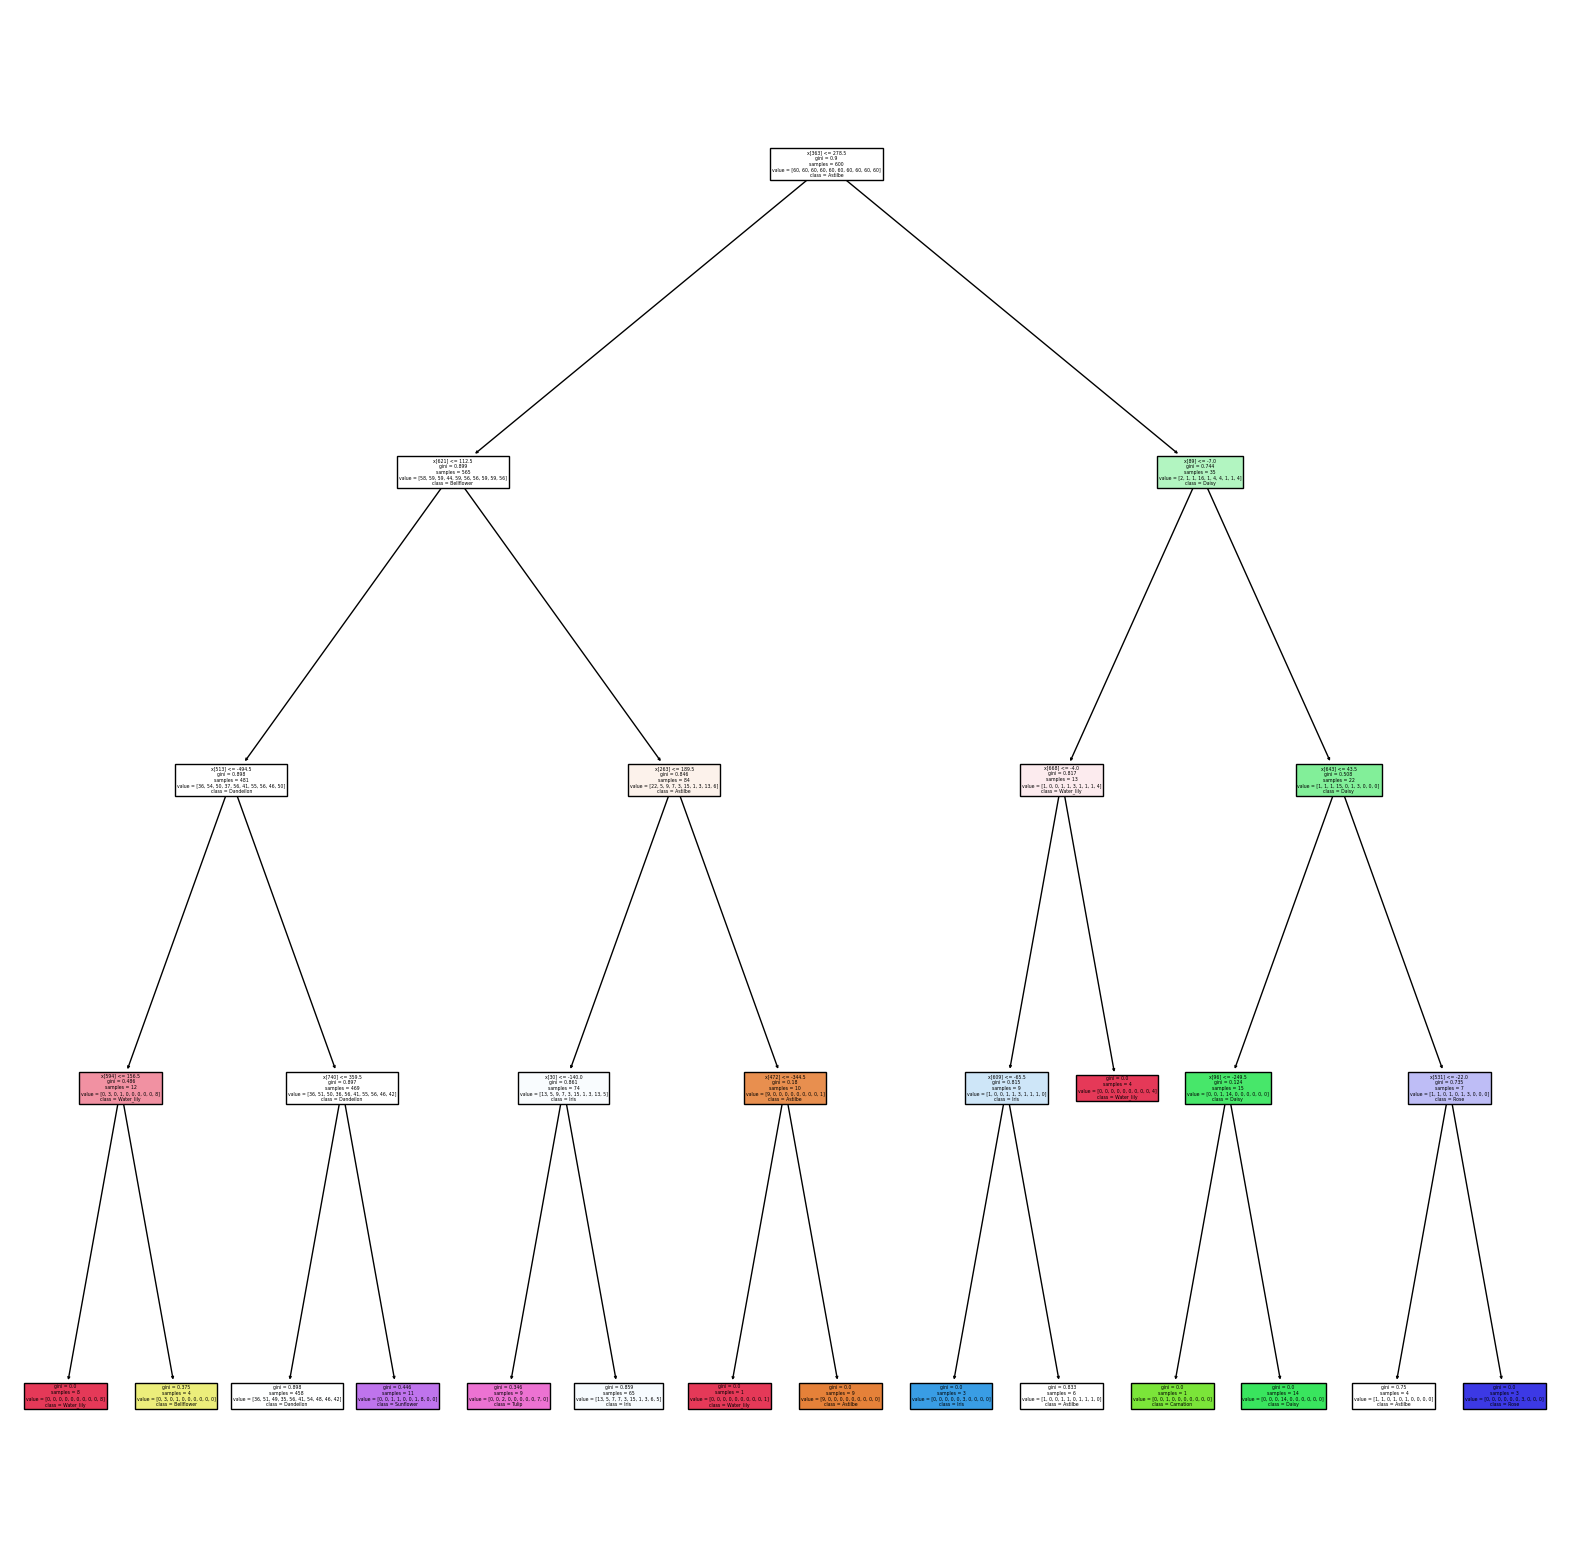

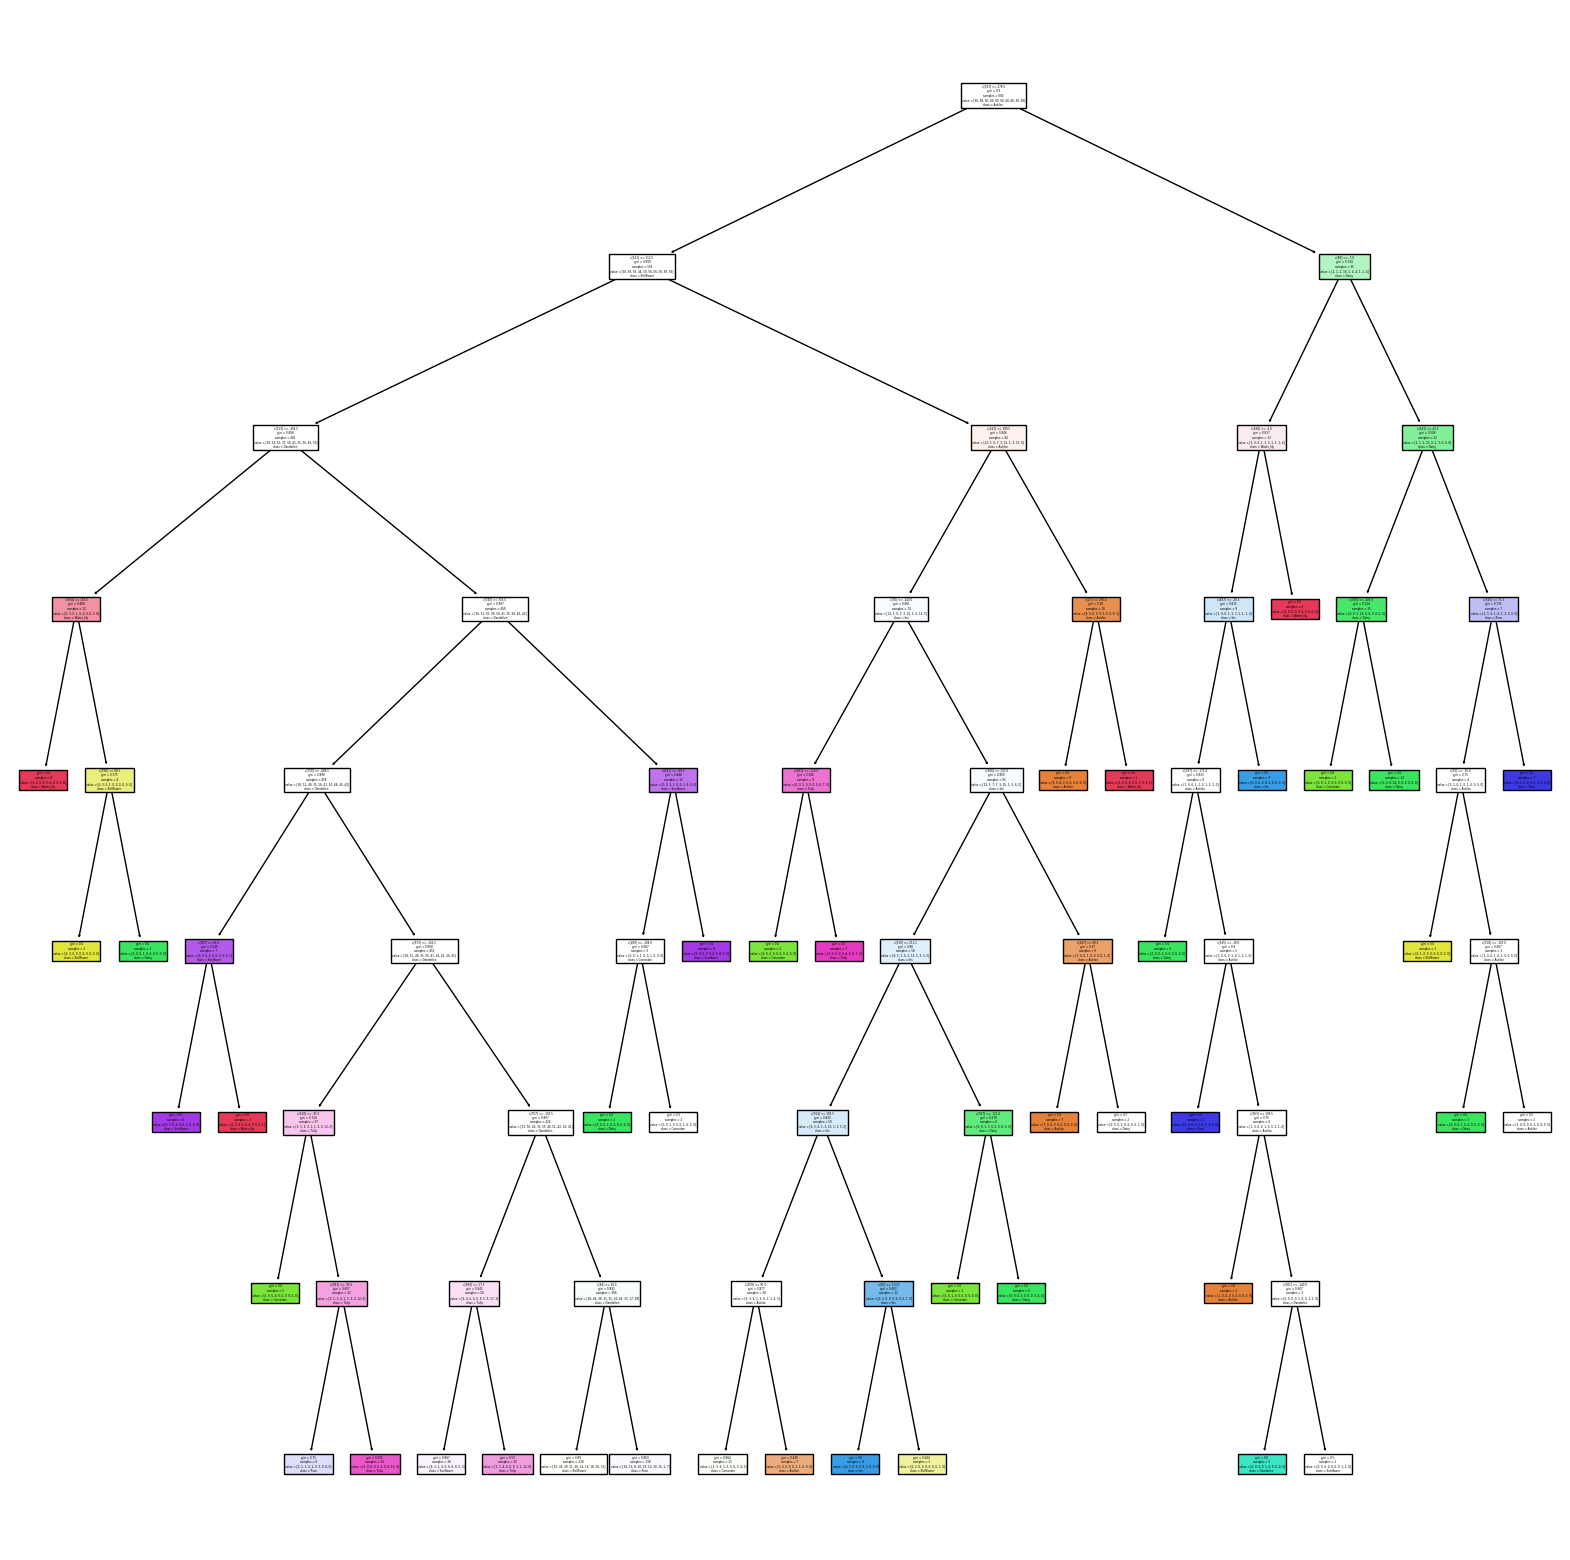

Best parameters {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score 0.15
(600, 768)
Train score 0.24666666666666667
Test score 0.075
Feature: [[[ 180.  298.  296.]
  [-261. -381. -440.]
  [-135.  -23.  -39.]
  [-114. -166. -136.]
  [ 100.  291.  265.]
  [   5. -148.  -59.]
  [ -66.  129.   54.]
  [ -28.  -61.  -32.]
  [-134.  -41.  -50.]
  [-210. -152. -216.]
  [  46.  -68.  -19.]
  [ 212.  488.  474.]
  [-301. -314. -352.]
  [  49.  -71.  -60.]
  [   8.   -7.    3.]
  [  62.  166.  154.]]

 [[ -29.  113.   49.]
  [ 137.   81.  144.]
  [  99.  138.  125.]
  [  -7.  194.  160.]
  [ -37. -344. -302.]
  [  64.  114.   63.]
  [  -4.  -37.   12.]
  [  57.  143.  121.]
  [  44. -132. -131.]
  [  23.  -46.    5.]
  [ 149.  276.  237.]
  [-149. -360. -331.]
  [ 173.  208.  247.]
  [ 112.   67.   80.]
  [ -13.  104.   79.]
  [  67.  -97.  -62.]]

 [[  66.  170.  135.]
  [ -56. -222. -166.]
  [-152. -171. -189.]
  [  73.  -17.   18.]
  [  58.  118.  114.]
  [  26.  -44.  -

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


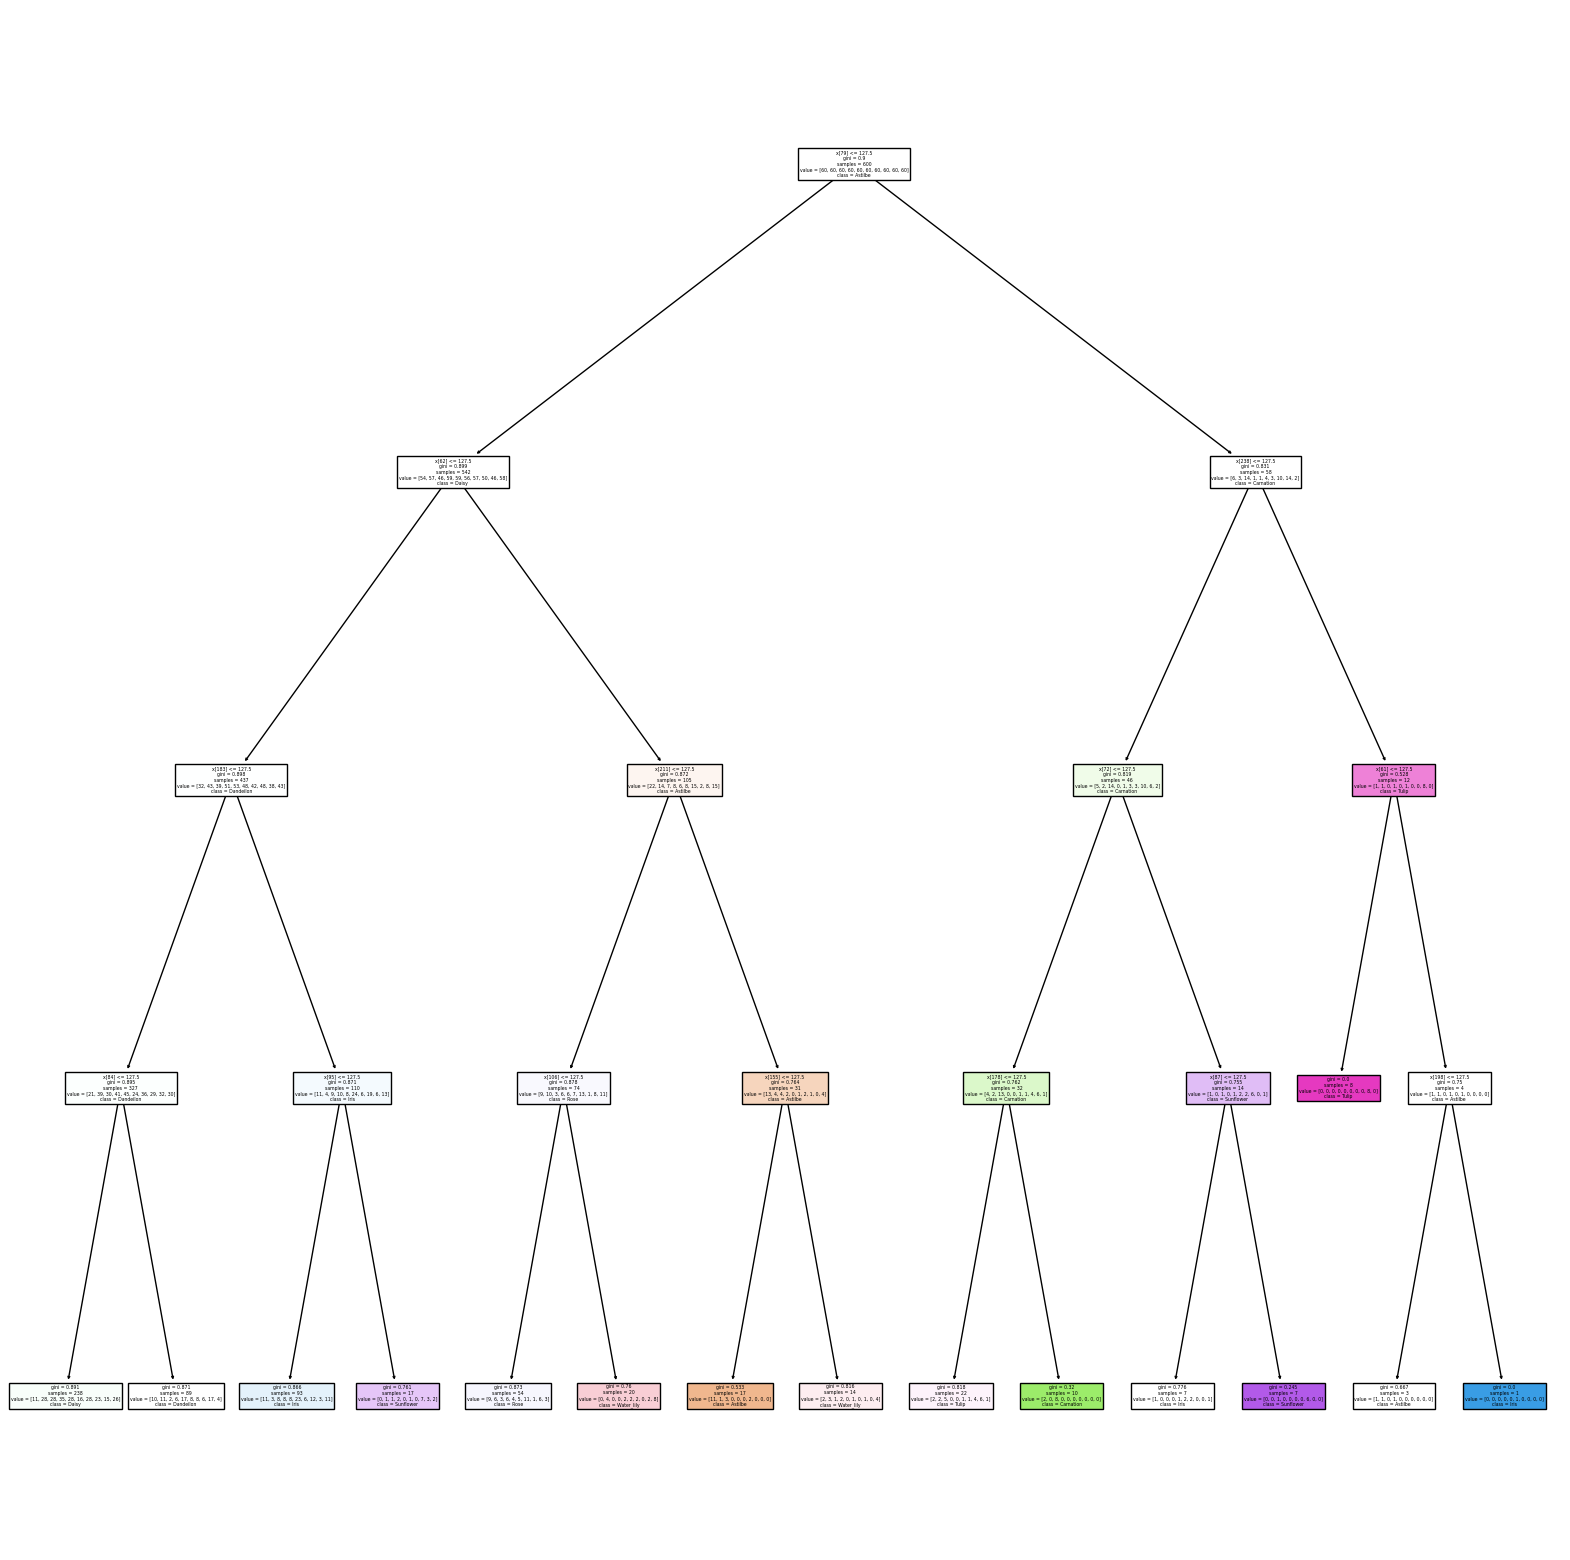

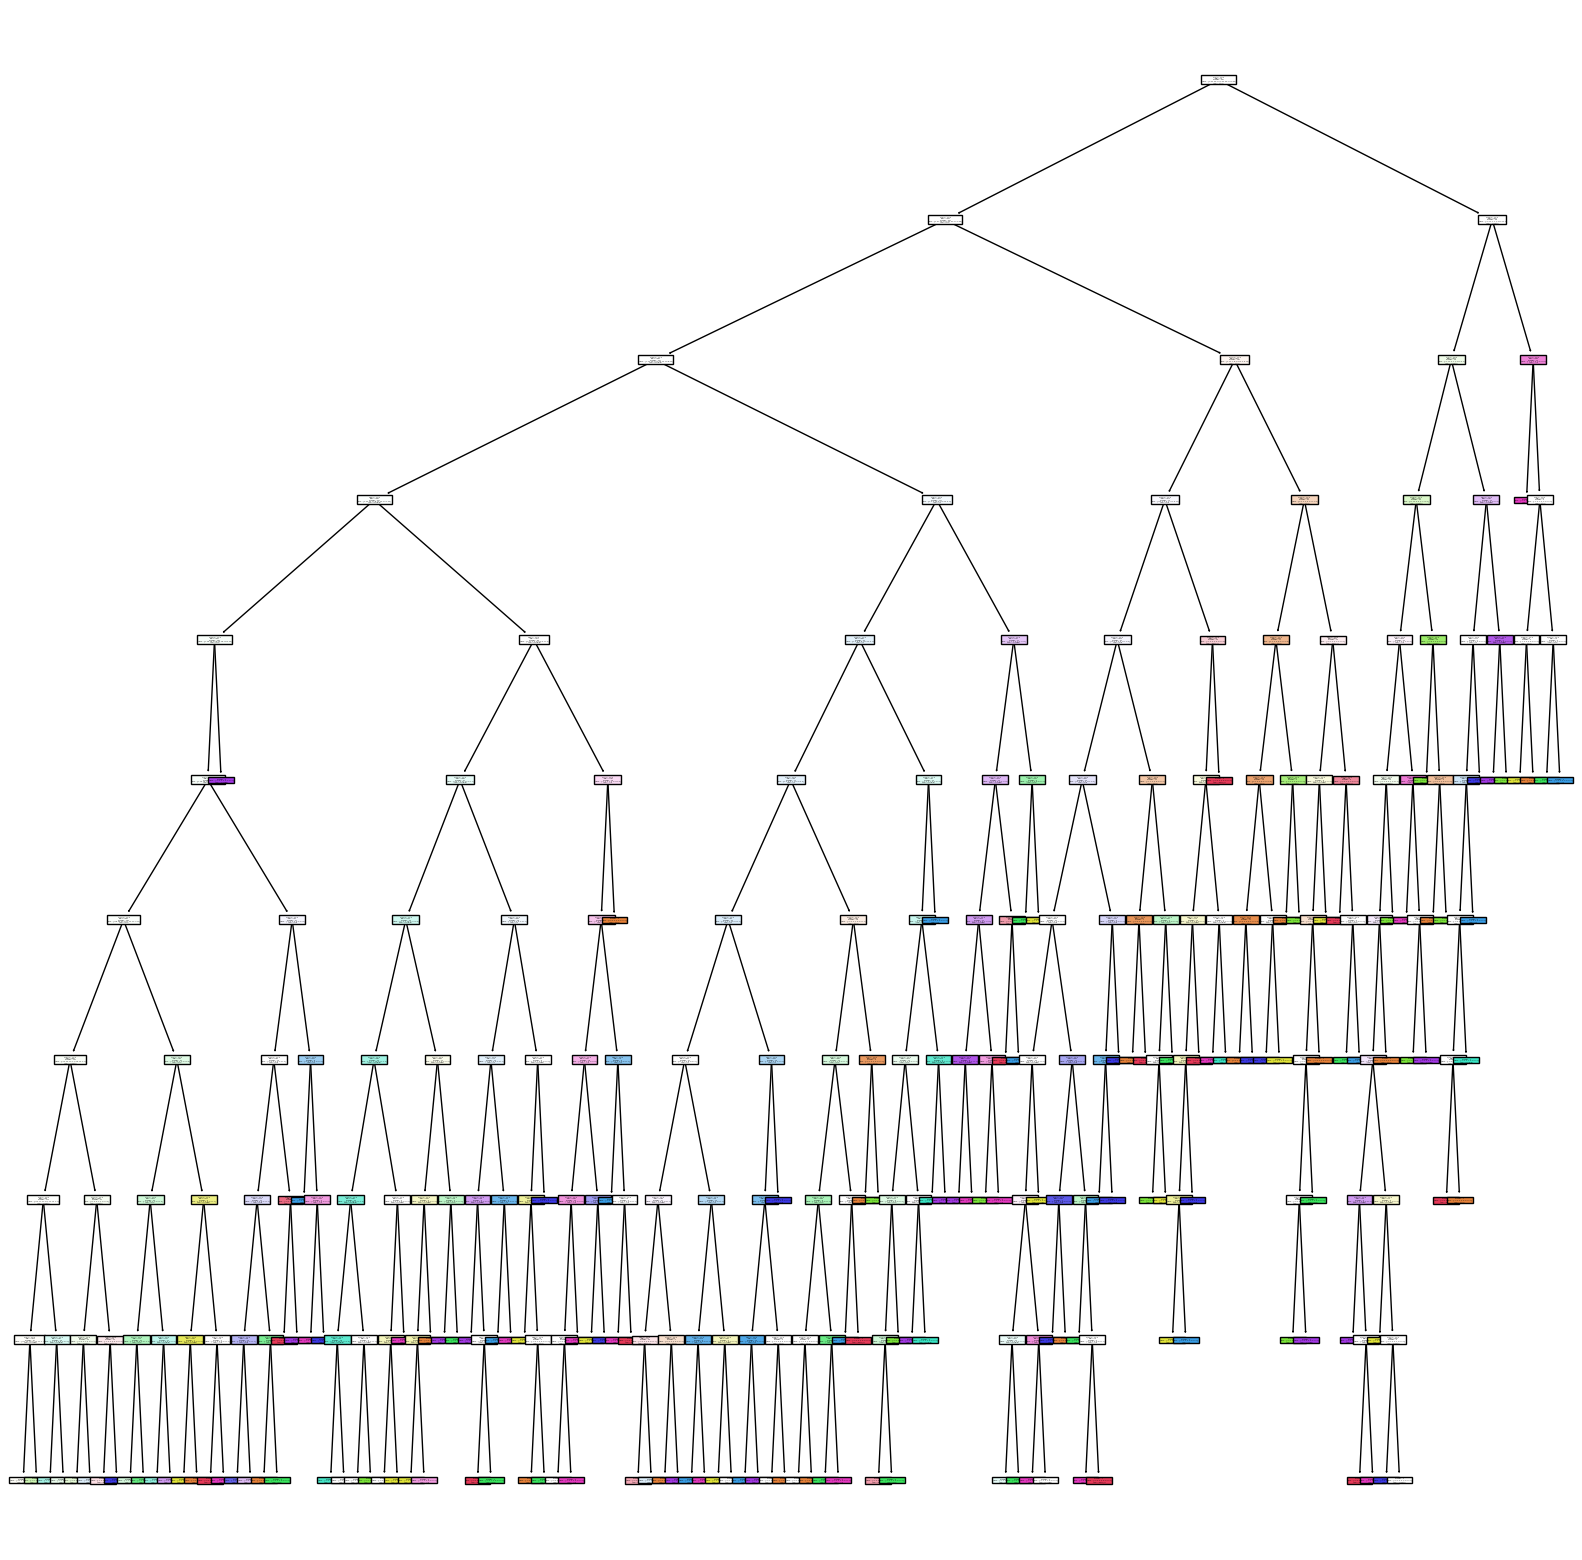

Best parameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score 0.13833333333333334
(600, 256)


"    pruned_tree = PrunedDecisionTree(max_depth=5)\n\n    # Train the model\n    pruned_tree.fit(train_features, train_labels)\n\n    # Visualize the decision tree before pruning\n    viz_before_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,\n                                class_names=['0', '1'])\n    viz_before_pruning.view()\n\n    # Perform post-pruning\n    pruned_tree.post_prune(train_features, train_labels)\n\n    # Visualize the decision tree after pruning\n    viz_after_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,\n                                class_names=['0', '1'])\n    viz_after_pruning.view()            "

In [7]:

#print("test7")
#--------------------FINAL PART--------------------------#
def extract_features_from_image(image):
    flattened_image = image.flatten()
    return flattened_image
#This method is one of the feature used for extraction methods.
def extract_color_features(image):  
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mean_color = np.mean(rgb_image, axis=(0, 1))
    std_color = np.std(rgb_image, axis=(0, 1))
    color_features = np.concatenate([mean_color, std_color])

    return color_features

# Function to extract features
def extract_features(images):
    features = []
    for image in images:
        feature = extract_features_from_image(image)
        features.append(feature)
    return np.array(features)

def extract_features_ColorRgb(images):
    features = []
    for image in images:
        feature = extract_color_features(image)
        features.append(feature)
    return np.array(features)
# Function to train the     decision tree model
def train_decision_tree(train_features, train_labels,test_features,test_labels):
    model = DecisionTree(max_depth=4 )
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    # model = DecisionTreeClassifier(max_depth=4)
    # model.fit((train_features), train_labels)
    # classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    # plt.figure(figsize=(20,20))
    # tree.plot_tree(model,class_names=classes,filled=True)   
    model = DecisionTree.start()
    model.fit((train_features), train_labels)
    plt.figure(figsize=(20,20))
    tree.plot_tree(model,class_names=classes,filled=True)       
    y_train_pred = model.predict(train_features)
    y_test_pred = model.predict(test_features)    
    print(f'Train score {accuracy_score(y_train_pred,train_labels)}')
    print(f'Test score {accuracy_score(y_test_pred,test_labels)}')
    # plot_confusionmatrix(y_train_pred,train_labels,dom='Train')
    # plot_confusionmatrix(y_test_pred,test_labels,dom='Test')                                                                               
    return model

# Function to evaluate the model
def evaluate_model(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')
    confusion = confusion_matrix(test_labels, predictions)

    return accuracy, precision, recall, f1, confusion


def print_decision_tree_rules(model, feature_names):
    tree_rules = []
    tree_ = model.tree_

    def recurse(node):
        nonlocal tree_rules
        if tree_.feature[node] != -2:  
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            rule = f"{name} <= {threshold:.4f}"
            tree_rules.append(rule)
            recurse(tree_.children_left[node])

            rule = f"{name} > {threshold:.4f}"
            tree_rules.append(rule)
            recurse(tree_.children_right[node])
        else:
            tree_rules.append(f"Class {np.argmax(tree_.value[node])}")

    recurse(0)
    return tree_rules

# # Load your dataset and perform train/test split
# # Replace the placeholder paths with the actual paths to your dataset
# nameofclass = "astilbe"
# train_images_path = "flower_photos/train/"+nameofclass
# test_images_path = "flower_photos/test/"+nameofclass


# def load_dataset(images_path):
#     images = []
#     labels = []

#     for root, dirs, files in os.walk(images_path):
#         for file in files:
#             # Assuming image names are in the format "label_image_number.jpg"
#             label = file.split("_")[0]  # Extract the label from the filename
#             label = int(label)  

#             image_path = os.path.join(root, file)
#             image = cv2.imread(image_path)  # Use OpenCV to read the image
#             # You may need to resize or preprocess the image based on your requirements

#             images.append(image)
#             labels.append(label)

# #     return images, labels


# # Load training data
# train_images, train_labels = load_dataset(train_images_path)

# # Load test data
# test_images, test_labels = load_dataset(test_images_path)
def plot_confusionmatrix(y_train_pred,y_train,dom):
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":

    Laplaciantrain_features = extract_features(Train_Laplacian)
    Laplaciantest_features = extract_features(Tree_Laplacian)
    #******
    CannyEdgetrain_features = extract_features(Train_CannyEdge)
    CannyEdgetest_features = extract_features(Test_CannyEdge)
    #******
    RGBtrain_features = extract_features(Train_RGB)
    RGBtest_features = extract_features(Test_RGB)
    #******
    """train_features = np.concatenate((Laplaciantrain_features, CannyEdgetrain_features, RGBtrain_features), axis=1)
    test_features = np.concatenate((Laplaciantest_features, CannyEdgetest_features, RGBtest_features), axis=1)"""
    train_features = Laplaciantrain_features
    test_features = Laplaciantest_features
    #******
    model = train_decision_tree(train_features, train_labels,test_features,test_labels)
    
# Print feature importances
    feature_importances = model.feature_importances_
    #feature_names = [f"pixel{i}" for i in range(1,256 + 1)]
    feature_names = []
    for feature_name, importance in zip(train_images, feature_importances):
        print(f"Feature: {feature_name}, Importance: {importance}")
        feature_names.append(feature_name)
    accuracy, precision, recall, f1, confusion = evaluate_model(model, test_features, test_labels)
    predictions = model.predict(test_features)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    num_pixels = len(train_features[0])
    ftNames = [f"Pixel{i}" for i in range(1, num_pixels + 1)]
    #ftNames=["ReSize","CannyEdge","RGB"]
    rules = print_decision_tree_rules(model, ftNames)
    for rule in rules:
        print(rule)

    misclassified_indices = np.where(test_labels != predictions)[0]
    for idx in misclassified_indices[:5]:  
        print(f"Misclassified Image: {idx}")
    params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
    bestScoreOfgcv,bestParams,model=PrunedDecisionTree.prunded(train_features,train_labels,test_features,test_labels,params,model)
    plt.figure(figsize=(20,20))
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    tree.plot_tree(model,class_names=classes,filled=True)
    plt.show()
    print(f'Best parameters {bestParams}')
    print(f'Best score {bestScoreOfgcv}')
    print(train_features.shape)
    
    #*************** these methods for confusion matrix  it opsional to use it or not
    # print(train_features)
    # print(f'Train score {accuracy_score(y_train_pred,train_features)}')
    # print(f'Test score {accuracy_score(y_test_pred,test_features)}')
    # plot_confusionmatrix(y_train_pred,train_features,dom='Train')
    # plot_confusionmatrix(y_test_pred,test_features,dom='Test')

    train_features = CannyEdgetrain_features
    test_features = CannyEdgetest_features
    #******
    
    model = train_decision_tree(train_features, train_labels,test_features,test_labels)
    
# Print feature importances
    feature_importances = model.feature_importances_
    feature_names = []  # Replace with actual feature names
    
    for feature_name, importance in zip(train_images, feature_importances):
        print(f"Feature: {feature_name}, Importance: {importance}")
        feature_names.append(feature_name)
    accuracy, precision, recall, f1, confusion = evaluate_model(model, test_features, test_labels)
    predictions = model.predict(test_features)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    num_pixels = len(train_features[0])
    ftNames = [f"Pixel{i}" for i in range(1, num_pixels + 1)]
    #ftNames=["ReSize","CannyEdge","RGB"]
    rules = print_decision_tree_rules(model, ftNames)
    for rule in rules:
        print(rule)

    misclassified_indices = np.where(test_labels != predictions)[0]
    for idx in misclassified_indices[:5]:  
        print(f"Misclassified Image: {idx}")
    params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
    bestScoreOfgcv,bestParams,model=PrunedDecisionTree.prunded(train_features,train_labels,test_features,test_labels,params,model)
    plt.figure(figsize=(20,20))
    classes = ['Astilbe','Bellflower','Carnation','Daisy','Dandeilon','Iris','Rose','Sunflower','Tulip','Water_lily']
    tree.plot_tree(model,class_names=classes,filled=True)
    plt.show()
    print(f'Best parameters {bestParams}')
    print(f'Best score {bestScoreOfgcv}')
    print(train_features.shape)


"""    pruned_tree = PrunedDecisionTree(max_depth=5)

    # Train the model
    pruned_tree.fit(train_features, train_labels)

    # Visualize the decision tree before pruning
    viz_before_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,
                                class_names=['0', '1'])
    viz_before_pruning.view()

    # Perform post-pruning
    pruned_tree.post_prune(train_features, train_labels)

    # Visualize the decision tree after pruning
    viz_after_pruning = dtreeviz(pruned_tree.model, train_features, train_labels, target_name='Class', feature_names=None,
                                class_names=['0', '1'])
    viz_after_pruning.view()            """                                                